#ML Project



In [ ]:
!pip install mahotas
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 5.7 MB 4.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ML DataSet/

Mounted at /content/drive
/content/drive/MyDrive/ML DataSet


## Preprocessing

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import cv2
from google.colab.patches import cv2_imshow
import cv2		
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow	
import pickle

def HairRemoval(src):
  # Convert the original image to grayscale
  grayScale = cv2.cvtColor( src, cv2.COLOR_BGR2GRAY )  
  # cv2_imshow(grayScale)
  #the quality of JPEG is specified by cv2.IMWRITE_JPEG_QUALITY. 0 is the lowest and 100 is the highest, the default is 95.
  # cv2.imwrite('grayScale_sample1.jpg', grayScale, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

  # Kernel for the morphological filtering
  #the shape(1 - >Cross , 0 -> rectangular, 2-> eliptical), 17 x 17 is the dimension of kernal
  kernel = cv2.getStructuringElement(1,(17,17)) 

  # Perform the blackHat filtering on the grayscale image to find the 
  # hair countours

  #blackhat-> to enchance dark objects in the light background. (hair are dark, skin is white )
  blackhat_algo_flag=cv2.MORPH_BLACKHAT
  blackhat = cv2.morphologyEx(grayScale,blackhat_algo_flag , kernel)
  # cv2_imshow(blackhat)
  # cv2.imwrite('blackhat_sample1.jpg', blackhat, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

  # intensify the hair countours in preparation for the inpainting algorithm
  #10 and 255 is the min and max range. pixel between this intensity are intensified

  ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
  # print( thresh2.shape )
  # cv2_imshow(thresh2)
  # cv2.imwrite('thresholded_sample1.jpg', thresh2, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

  # inpaint the original image depending on the mask

  inpaint_algo_flag=cv2.INPAINT_TELEA
  dst = cv2.inpaint(src,thresh2,5,inpaint_algo_flag)
  # cv2_imshow(dst)
  # cv2.imwrite('InPainted_sample1.jpg', dst, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# ------------------------------------Median Filterin -----------------------------------
  load_image = dst 
  #kernel is the kernel size
  kernel = 3
  load_image_median = cv2.medianBlur(load_image, kernel) # Adding median filter 

  # cv2_imshow(load_image_median) 
# --------------------------------------Otsu--------------------------------------------
  image1 = load_image_median
  img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

  ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +
                        cv2.THRESH_OTSU)	

  # cv2_imshow(thresh1)	

# -----------------------------------Chan vese ------------------------------------------

  src = thresh1
  # grayScale = cv2.cvtColor( src, cv2.COLOR_BGR2GRAY )  

  image = img_as_float(thresh1)

  # Feel free to play around with the parameters to see how they impact the result
  cv = chan_vese(image, mu=0.05, lambda1=1, lambda2=1, tol=1e-3,
                max_iter = 150, dt=0.5, init_level_set="checkerboard",
                extended_output=True)

  # plt.imshow(cv[1],cmap = "gray")
  # plt.xticks([])
  # plt.yticks([])
  # plt.show()
  return cv



In [ ]:

# src = cv2.imread("Benign/benign41.jpg")   #importing image
# src = cv2.resize(src,(275,183))   #compressing image
# print( src.shape )
# cv2_imshow( src )
# cv = HairRemoval(src)

In [ ]:
import cv2
import numpy as np
import mahotas
import mahotas.demos
import math
from sklearn.preprocessing import MinMaxScaler
from skimage import feature,img_as_ubyte
def preprocessing(cv_1,):
  img = cv_1
  ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
  # cv2_imshow( thresh)
  area2 = cv2.countNonZero(thresh)
  # print(area2)

  x = cv_1
  hor_flip = np.fliplr(x)
  ver_flip = np.flipud(x)
  diff1 = x - hor_flip
  diff2 = x - ver_flip
  ret, thresh = cv2.threshold(diff1,0,255,cv2.THRESH_BINARY)

  area_hor = cv2.countNonZero(thresh)
  # print(area_hor)

  ret, thresh = cv2.threshold(diff2,0,255,cv2.THRESH_BINARY)

  area_ver = cv2.countNonZero(thresh)
  # print(area_ver)
  assymetry_index  = (((area2 - area_hor)/area2) + ((area2 - area_ver)/area2))/2
  # print(assymetry_index)

  value = mahotas.features.eccentricity(cv_1)
  # print(value)

  slice1Copy = np.uint8(cv_1)
  canny = cv2.Canny(slice1Copy,100,200)
  perimeter = 0 
  for i in canny:
    perimeter+=i.tolist().count(255)
  border_irregularity = (perimeter**2)/(4 * np.pi*area2)
  # print(border_irregularity)
  diameter = math.sqrt(4*area2/np.pi)
  # print(diameter)

  
  scaler = MinMaxScaler(feature_range=[-0.99,0.99])
  scaled_cv1 = scaler.fit_transform(cv[1])
  # print(scaled_cv1)

  glcm = feature.greycomatrix(image=img_as_ubyte(scaled_cv1), distances=[1],
                                    angles=[0, np.pi/4, np.pi/2, np.pi * 3/2],
                                    symmetric=True, normed=True)

  correlation = np.mean(feature.greycoprops(glcm, prop='correlation'))
  homogeneity = np.mean(feature.greycoprops(glcm, prop='homogeneity'))
  energy = np.mean(feature.greycoprops(glcm, prop='energy'))
  contrast = np.mean(feature.greycoprops(glcm, prop='contrast'))
  # print(correlation)
  # print(homogeneity)
  # print(energy)
  # print(contrast)
  return [assymetry_index,value,border_irregularity,diameter,correlation,homogeneity,energy,contrast]


In [ ]:
name = "benign/melanoma_"
feature_list = []
class_list = []
for i in range(0,2001):
  class_list.append(0)
  img = name+str(i)+".jpg"
  # print(img)
  print(i)
  src = cv2.imread(img)   #importing image
  # print(src)
  src = cv2.resize(src,(275,183))   #compressing image
  cv = HairRemoval(src)
  prep = preprocessing(cv[1])
  feature_list.append(prep)
feature_list

import csv
import numpy

a = numpy.array(feature_list)

with open('myfile.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(a)

In [ ]:
name = "malignant/melanoma_"
# feature_list = []
# class_list = []
for i in range(5000,7001):
  class_list.append(1)
  img = name+str(i)+".jpg"
  src = cv2.imread(img)   #importing image
  src = cv2.resize(src,(275,183))   #compressing image
  # print(src.shape)
  # cv2_imshow(src)
  print(i)
  cv = HairRemoval(src)
  prep = preprocessing(cv[1])
  feature_list.append(prep)
feature_list

import csv
import numpy

a = numpy.array(feature_list)

with open('myfile_malignant.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(a)

In [ ]:
name = "unknown/unknown"
# feature_list = []
# class_list = []
for i in range(1,81):
  class_list.append(2)
  img = name+str(i)+".jpg"
  src = cv2.imread(img)   #importing image
  src = cv2.resize(src,(275,183))   #compressing image
  # print( src.shape )
  # cv2_imshow( src )
  cv = HairRemoval(src)
  prep = preprocessing(cv[1])
  feature_list.append(prep)
feature_list

In [ ]:
import pandas as pd

df1 = pd.DataFrame(feature_list)
df2 = pd.DataFrame(class_list)

df2
df = pd.concat([df1,df2],axis=1)
df
df.columns = ['Assymetry_index', 'Eccentricity', 'Border_Irregularity','Diameter','Corelation','Homogeniety','Energy','Contrast','label']

df.to_csv('data_frame.csv')

NameError: ignored

## Loading from CSV

In [ ]:
import pandas as pd
df = pd.read_csv("data_cnn.csv")

In [ ]:
df.drop(df.tail(2).index,inplace=True) # drop last n rows
df = df.drop(['Eccentricity'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
df.isnull().sum()
# print(df)

Assymetry_index        0
Border_Irregularity    0
Diameter               0
Corelation             0
Homogeniety            0
Energy                 0
Contrast               0
label                  0
dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1] , test_size=0.20)
# X_train, X_val, y_train, y_val = train_test_split(df.iloc[:,:-1],df.iloc[:,-1] , test_size=0.20)
X_train

,Assymetry_index,Border_Irregularity,Diameter,Corelation,Homogeniety,Energy,Contrast
89,-0.262818,0.860043,158.917294,0.915688,0.577411,0.379814,2076.634685
2486,-1.019186,1.655468,125.676317,0.875970,0.650225,0.499984,2667.023105
3356,0.210340,27.969828,200.965565,0.874706,0.670390,0.352034,3493.526858
2478,-2.400027,4.112158,96.850172,0.802244,0.716133,0.622862,3454.447900
2921,0.089594,0.601426,187.164739,0.843379,0.560037,0.385775,3675.822587
...,...,...,...,...,...,...,...
873,0.347776,4.850612,221.127772,0.865097,0.557774,0.257055,3141.495872
3850,0.354782,3.507025,222.325060,0.913871,0.604275,0.259482,2035.725008
2546,-0.019206,3.059225,176.893005,0.954313,0.708560,0.441144,1251.125010
1758,0.062505,1.270026,184.440815,0.945792,0.608797,0.361079,1418.699875


In [ ]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train, y_train)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# scaler.fit(X_val)
X_test = scaler.fit_transform(X_test)
X_train

array([[-0.25518007,  0.64171159, -1.06968659, ...,  1.88493962,
         1.97705615, -0.62149758],
       [ 0.47354131, -0.62878665,  1.04551462, ..., -0.55797179,
        -0.89388564, -0.58008061],
       [ 0.45925893, -0.57201317,  0.94444299, ..., -1.57721087,
        -1.02371417, -0.14605035],
       ...,
       [-0.46215149, -0.13598131, -1.2965556 , ...,  1.7186827 ,
         1.98286755, -0.8233289 ],
       [-0.14929904, -0.37610564, -0.92587163, ..., -0.06175612,
         0.39599821, -0.09579809],
       [ 0.39264698,  0.23579248,  0.54566244, ...,  0.50338368,
        -0.35738253, -0.9108026 ]])

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2",'none'],"solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],"multi_class":["auto","ovr","multinominal"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid)
logreg_cv.fit(X_train,y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'multi_class': ['auto', 'ovr', 'multinominal'],
                         'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
logreg_cv.best_params_

{'C': 100.0, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
clf = LogisticRegression(C=0.001,multi_class='auto',penalty='none',solver='newton-cg',max_iter=1000).fit(X_train, y_train)
train_score = clf.score(X_train,y_train)
cv = StratifiedKFold(n_splits=5,shuffle=True)
train_size,train_scores,test_scores = learning_curve(estimator=clf,X=X_train,y=y_train,cv=cv,scoring="accuracy")
print(train_size)
train_scores = 1-np.mean(train_scores,axis=1)
test_scores = 1-np.mean(test_scores,axis=1)
print(train_score)
y_pred = clf.predict(X_test)
print("Accuracy Score : "+ str(accuracy_score(y_pred,y_test)))
print("Precision Score : "+ str(precision_score(y_pred,y_test,average='weighted')))
print("Recall Score : "+ str(recall_score(y_pred,y_test,average='weighted')))
print("F1 Score : "+ str(f1_score(y_pred,y_test,average='weighted')))
# sns.lineplot(data=lc["learning_curve"],x="Training_size",y="value",hue="variable")

[ 256  833 1410 1987 2565]
0.7212347988774556
Accuracy Score : 0.7281795511221946
Precision Score : 0.7327981593929628
Recall Score : 0.7281795511221946
F1 Score : 0.7288558816229568


In [ ]:
# train_size
lc

NameError: ignored

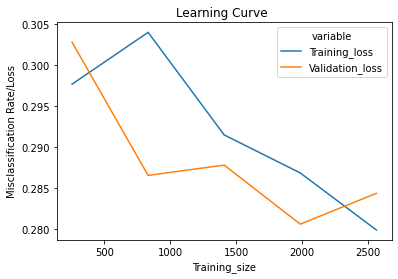

In [ ]:
import seaborn as sns
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
sns.lineplot(data=lc,x="Training_size",y="value",hue="variable")
plt.title("Learning Curve ")
plt.ylabel("Misclassification Rate/Loss");

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
clf = LogisticRegression(C=0.001,multi_class='auto',penalty='none',solver='newton-cg',max_iter=2000).fit(X_train, y_train)
train_score = clf.score(X_train,y_train)
cv = StratifiedKFold(n_splits=5,shuffle=True)
train_size,train_scores,test_scores = learning_curve(estimator=clf,X=X_train,y=y_train,cv=cv,scoring="accuracy")
print(train_size)
train_scores = 1-np.mean(train_scores,axis=1)
test_scores = 1-np.mean(test_scores,axis=1)
print(train_score)
y_pred = clf.predict(X_test)
print("Accuracy Score : "+ str(accuracy_score(y_pred,y_test)))
print("Precision Score : "+ str(precision_score(y_pred,y_test,average='weighted')))
print("Recall Score : "+ str(recall_score(y_pred,y_test,average='weighted')))
print("F1 Score : "+ str(f1_score(y_pred,y_test,average='weighted')))

[ 256  833 1410 1987 2565]
0.7212347988774556
Accuracy Score : 0.7281795511221946
Precision Score : 0.7327981593929628
Recall Score : 0.7281795511221946
F1 Score : 0.7288558816229568


Text(0, 0.5, 'Misclassification Rate/Loss')

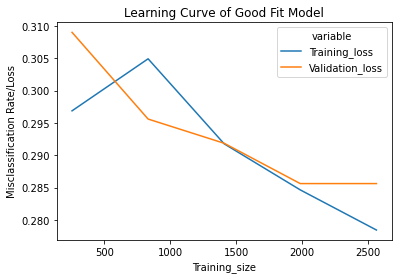

In [ ]:
import seaborn as sns
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
sns.lineplot(data=lc,x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Good Fit Model")
plt.ylabel("Misclassification Rate/Loss")

In [ ]:
lc

,Training_size,variable,value
0,256,Training_loss,0.296875
1,833,Training_loss,0.304922
2,1410,Training_loss,0.291773
3,1987,Training_loss,0.284650
4,2565,Training_loss,0.278441
5,256,Validation_loss,0.309015
6,833,Validation_loss,0.295604
7,1410,Validation_loss,0.291858
8,1987,Validation_loss,0.285623
9,2565,Validation_loss,0.285623


In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[271, 128],
       [ 90, 313]])

In [ ]:
cm_df = pd.DataFrame(cm, index = ['BENIGN','MALIGNANT'], columns = ['BENIGN','MALIGNANT'])


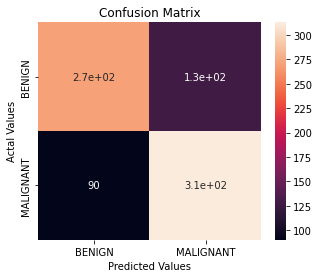

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
rf = RandomForestClassifier(n_estimators=2000).fit(X_train, y_train)
train_score = rf.score(X_train,y_train)
cv = StratifiedKFold(n_splits=5,shuffle=True)
train_size,train_scores,test_scores = learning_curve(estimator=clf,X=X_train,y=y_train,cv=cv,scoring="accuracy",random_state=11)
train_scores = 1-np.mean(train_scores,axis=1)
test_scores = 1-np.mean(test_scores,axis=1)
print(train_score)
y_pred = rf.predict(X_test)
print("Accuracy Score : "+ str(accuracy_score(y_pred,y_test)))
print("Precision Score : "+ str(precision_score(y_pred,y_test,average='weighted')))
print("Recall Score : "+ str(recall_score(y_pred,y_test,average='weighted')))
print("F1 Score : "+ str(f1_score(y_pred,y_test,average='weighted')))

1.0
Accuracy Score : 0.7581047381546134
Precision Score : 0.760993558939272
Recall Score : 0.7581047381546134
F1 Score : 0.7584890289974824


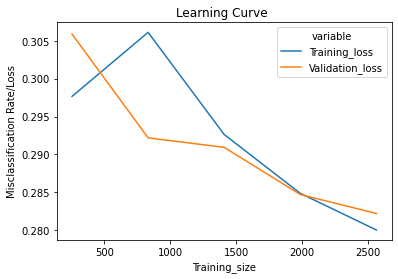

In [ ]:
import seaborn as sns
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
sns.lineplot(data=lc,x="Training_size",y="value",hue="variable")
plt.title("Learning Curve ")
plt.ylabel("Misclassification Rate/Loss");

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [
              ('rf', RandomForestClassifier(max_depth=20, n_estimators=2000)),
              ('mlp', MLPClassifier(activation='relu', solver='adam', alpha=0.01,  max_iter=240)), 
              ('knn', KNeighborsClassifier(n_neighbors=7, weights='distance')),
              (('svm', make_pipeline(StandardScaler(), 
                                    SVC(C=10, gamma="auto", max_iter = 5000))))
              ]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Accuracy Score : "+ str(accuracy_score(y_pred,y_test)))
print("Precision Score : "+ str(precision_score(y_pred,y_test,average='weighted')))
print("Recall Score : "+ str(recall_score(y_pred,y_test,average='weighted')))
print("F1 Score : "+ str(f1_score(y_pred,y_test,average='weighted')))

Accuracy Score : 0.7917705735660848
Precision Score : 0.8104062902254181
Recall Score : 0.7917705735660848
F1 Score : 0.7938105346316559


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['BENIGN','MALIGNANT'], columns = ['BENIGN','MALIGNANT'])

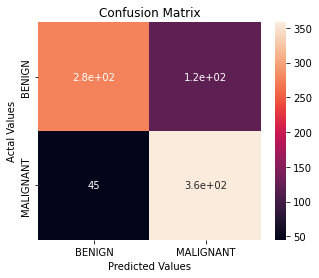

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# CNN with SMTP

In [ ]:
import pandas as pd
df = pd.read_csv("data_cnn.csv")


In [ ]:
df.shape

(4539, 83)

In [ ]:
df.drop_duplicates()

,id,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x74,x75,x76,x77,x78,x79,x80,x81,TypeMelanoma,TypeMelanoma.1
0,1,0.901336,896.724963,440.857183,55,181,12444,23623,516,133,...,-0.237962,0.379655,0.006688,35.740493,4.571265,0.007070,68.087617,7.147377,1,0
1,2,0.604008,621.320851,176.068179,0,194,8602,1462,3824,1,...,-0.230218,0.346930,0.006940,51.781562,5.629637,0.006646,29.646711,4.436845,1,0
2,3,0.751895,1089.872150,311.061631,15,846,27261,530,11672,194,...,-0.157656,0.172056,0.007195,67.380431,6.681474,0.007376,78.071641,7.881048,1,0
3,4,0.632203,1428.097546,344.017297,0,790,47809,915,2723,0,...,-0.158760,0.098665,0.006987,42.875692,5.131002,0.007407,84.822635,8.334675,1,0
4,5,0.546859,1372.884343,315.822258,181,1471,43247,2698,2009,876,...,-0.169737,0.203955,0.006926,50.760299,5.710937,0.007503,87.450958,8.526543,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,4535,0.732729,2640.253967,660.133269,0,176735,5444,0,5702,6,...,-0.181683,0.103781,0.007249,76.256463,7.062796,0.006949,71.548846,7.330228,2,1
4535,4536,0.701454,1023.060967,305.606104,3,5728,6636,11601,0,18766,...,-0.204830,0.123630,0.007039,71.742842,6.982504,0.006650,62.584720,6.749176,2,1
4536,4537,0.518194,2133.016377,427.986321,272,5484,61807,13334,2843,830,...,-0.233328,0.673156,0.007527,92.656773,8.656649,0.007021,77.378124,7.783383,2,1
4537,4538,0.670947,2086.582828,687.028068,1036,183195,20070,11184,197,31803,...,-0.219156,0.276579,0.007237,80.891089,7.617215,0.007133,78.636153,7.861699,2,1


In [ ]:
# df.drop(df.tail(2).index,inplace=True) # drop last n rows
df = df.drop(['TypeMelanoma'], axis=1)
df = df.drop(['id'], axis=1)
df.isnull().sum()

x2                0
x3                0
x4                0
x5                0
x6                0
                 ..
x78               0
x79               0
x80               0
x81               0
TypeMelanoma.1    0
Length: 81, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1] , test_size=0.20)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test , test_size=0.50)
X_test.shape

(454, 80)

In [ ]:
X_train.shape

(3207, 7)

In [ ]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train, y_train)

In [ ]:
# import numpy as np
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# # scaler.fit(X_val)
# X_test = scaler.fit_transform(X_test)
# X_train

In [ ]:
X_train.shape

(3631, 80)

In [ ]:
import tensorflow as tf

In [ ]:

from tensorflow.keras.utils import to_categorical

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print(y_train_encoded.shape)
print(y_test_encoded.shape)

(3631, 2)
(454, 2)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D ,BatchNormalization, MaxPooling1D, Flatten


In [ ]:

my_model=Sequential([
                    # Dense(40,input_dim=80,activation='relu'),
                     Conv1D(filters=50,kernel_size=5,activation='relu',padding='same',input_shape=(80,1)),
                     MaxPooling1D(),
                     Flatten(),
                     Dense(20,activation='relu'),
                     BatchNormalization(),
                      Dense(10,activation='relu'),
                     Dense(2,activation='softmax'),

])

In [ ]:
adam=tf.keras.optimizers.Adam(lr=0.01)

In [ ]:

my_model.compile(
    optimizer=adam,
    loss= 'binary_crossentropy',
    metrics=['accuracy'],
)
my_model.build((None,80,1))
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 80, 50)            300       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 40, 50)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense (Dense)               (None, 20)                40020     
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                2

In [ ]:
saved_model=my_model.fit(X_train,y_train_encoded,epochs=50,validation_data = (X_val, y_val))

Epoch 1/50
114/114 [==============================] - 4s 17ms/step - loss: 0.5490 - accuracy: 0.7028 - val_loss: 0.5148 - val_accuracy: 0.7026
Epoch 2/50
114/114 [==============================] - 1s 12ms/step - loss: 0.5010 - accuracy: 0.7334 - val_loss: 0.4752 - val_accuracy: 0.7093
Epoch 3/50
114/114 [==============================] - 1s 13ms/step - loss: 0.4302 - accuracy: 0.7808 - val_loss: 0.5347 - val_accuracy: 0.7093
Epoch 4/50
114/114 [==============================] - 1s 9ms/step - loss: 0.3846 - accuracy: 0.8122 - val_loss: 0.3895 - val_accuracy: 0.7952
Epoch 5/50
114/114 [==============================] - 1s 7ms/step - loss: 0.3598 - accuracy: 0.8257 - val_loss: 0.3113 - val_accuracy: 0.8326
Epoch 6/50
114/114 [==============================] - 1s 6ms/step - loss: 0.3272 - accuracy: 0.8372 - val_loss: 0.2700 - val_accuracy: 0.8546
Epoch 7/50
114/114 [==============================] - 1s 7ms/step - loss: 0.2822 - accuracy: 0.8653 - val_loss: 0.2828 - val_accuracy: 0.8524
Epo

In [ ]:
import pickle as pk
filname1= "CNN81_sklearn.pkl"
pk.dump(saved_model,open(filname1,'wb'))

INFO:tensorflow:Assets written to: ram://0fdb7ebc-27b3-4e77-89fc-bbda17b0c031/assets


In [ ]:
_,acc=my_model.evaluate(X_test,y_test_encoded)

15/15 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9846


In [ ]:
print(acc)

0.984581470489502


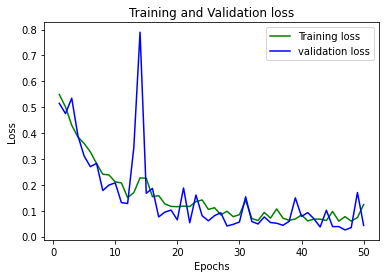

In [ ]:
import matplotlib.pyplot as plt

loss_train = saved_model.history['loss']
loss_val = saved_model.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred=my_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['BENIGN','MALIGNANT'], columns = ['BENIGN','MALIGNANT'])


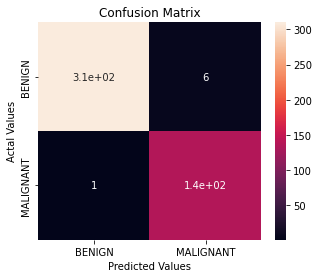

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Accuracy Score : "+ str(accuracy_score(y_pred,y_test)))
print("Precision Score : "+ str(precision_score(y_pred,y_test,average='weighted')))
print("Recall Score : "+ str(recall_score(y_pred,y_test,average='weighted')))
print("F1 Score : "+ str(f1_score(y_pred,y_test,average='weighted')))

Accuracy Score : 0.9845814977973568
Precision Score : 0.9847108035788609
Recall Score : 0.9845814977973568
F1 Score : 0.9845057997923662


# **CNN**  Abhyudit

In [ ]:
import pandas as pd
df = pd.read_csv("data_frame.csv")


In [ ]:
df.drop(df.tail(2).index,inplace=True) # drop last n rows
df = df.drop(['Eccentricity'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
df.isnull().sum()
# print(df)

Assymetry_index        0
Border_Irregularity    0
Diameter               0
Corelation             0
Homogeniety            0
Energy                 0
Contrast               0
label                  0
dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1] , test_size=0.20)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test , test_size=0.50)
X_test.shape

(401, 7)

In [ ]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train, y_train)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)
X_train

array([[ 0.45152186, -0.16645562,  0.75073195, ..., -1.28733266,
        -1.07890557,  1.2707476 ],
       [ 0.41490472, -0.07400114,  0.55710523, ..., -0.1502634 ,
        -0.43550155, -0.36003347],
       [ 0.46970448, -0.46606756,  0.85712156, ..., -1.04363296,
        -0.56729258,  1.4260286 ],
       ...,
       [ 0.14042986,  0.42500637, -0.37738095, ..., -0.27356523,
        -0.34986402, -0.45451908],
       [-0.50357979, -0.06841739, -1.30785885, ...,  0.16636268,
         0.67949416, -0.23490313],
       [-1.25076851, -0.26656965, -1.78938475, ...,  0.40768357,
         1.19610127, -0.09139854]])

In [ ]:
X_train.shape

(3207, 7)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D ,BatchNormalization, MaxPooling1D, Flatten
my_model=Sequential([
                    Dense(7,input_dim=7,activation='relu'),
                    #  Conv1D(filters=7,kernel_size=2,activation='relu',padding='same',input_shape=(80,1)),
                    #  MaxPooling1D(),
                    #  Flatten(),
                    #  Dense(20,activation='relu'),
                     BatchNormalization(),
                      Dense(4,activation='relu'),
                     Dense(2,activation='softmax'),

])

In [ ]:
adam=tf.keras.optimizers.Adam(lr=0.01)
my_model.compile(
    optimizer=adam,
    loss= 'binary_crossentropy',
    metrics=['accuracy'],
)
my_model.build((None,7,1))
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 batch_normalization_1 (Batc  (None, 7)                28        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 4)                 32        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
Total params: 126
Trainable params: 112
Non-trainable params: 14
_________________________________________________________________


In [ ]:
y_test_encoded.shape

(401, 2)

In [ ]:
y_val

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [ ]:
saved_model=my_model.fit(X_train,y_train_encoded,epochs=50,validation_data = (X_val, y_val))

Epoch 1/50
101/101 [==============================] - 1s 4ms/step - loss: 0.5799 - accuracy: 0.7116 - val_loss: 0.5514 - val_accuracy: 0.7257
Epoch 2/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.7328 - val_loss: 0.5315 - val_accuracy: 0.7656
Epoch 3/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5260 - accuracy: 0.7434 - val_loss: 0.5239 - val_accuracy: 0.7556
Epoch 4/50
101/101 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7487 - val_loss: 0.5120 - val_accuracy: 0.7581
Epoch 5/50
101/101 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7611 - val_loss: 0.4847 - val_accuracy: 0.7781
Epoch 6/50
101/101 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7655 - val_loss: 0.4672 - val_accuracy: 0.7805
Epoch 7/50
101/101 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7755 - val_loss: 0.5077 - val_accuracy: 0.7706
Epoch 

In [ ]:
import pickle as pk
filname1= "CNN7_sklearn.pkl"
pk.dump(saved_model,open(filname1,'wb'))

INFO:tensorflow:Assets written to: ram://caa6c7c3-d743-4a83-9c70-a1a34a304676/assets


In [ ]:
_,acc=my_model.evaluate(X_test,y_test_encoded)

13/13 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7581


In [ ]:
print(acc)

0.7581047415733337


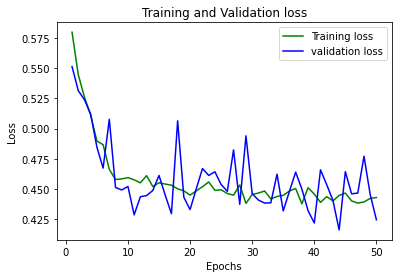

In [ ]:
import matplotlib.pyplot as plt

loss_train = saved_model.history['loss']
loss_val = saved_model.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_pred=my_model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['BENIGN','MALIGNANT'], columns = ['BENIGN','MALIGNANT'])

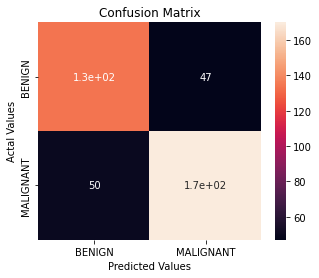

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Accuracy Score : "+ str(accuracy_score(y_pred,y_test)))
print("Precision Score : "+ str(precision_score(y_pred,y_test,average='weighted')))
print("Recall Score : "+ str(recall_score(y_pred,y_test,average='weighted')))
print("F1 Score : "+ str(f1_score(y_pred,y_test,average='weighted')))

Accuracy Score : 0.7581047381546134
Precision Score : 0.757862375703133
Recall Score : 0.7581047381546134
F1 Score : 0.7579409521398848
